In [1]:
import plyvel, lutils
import numpy as np
import sys
from matplotlib import pyplot as plt
plt.set_cmap('gray')
%matplotlib inline
#Switch to deepliver
sys.path.insert(0,"/opt/deepliver/python/")
def hist(arr):
    print "Label counts: ",np.sum(arr==0)," , ",np.sum(arr==1)," , ",np.sum(arr==2)

def dice(prediction, segmentation, label_of_interest = 1):
    """ takes 2 2-D arrays with class labels, and return a float dice score.
    Only label=label_of_interest is considered """
    if prediction.shape != segmentation.shape:
        raise ValueError("Shape mismatch between given arrays. prediction %s vs segmentation %s" % (str(prediction.shape), str(segmentation.shape)))

    n_liver_seg = np.sum(segmentation==label_of_interest)
    n_liver_pred= np.sum(prediction == label_of_interest)
    denominator = n_liver_pred + n_liver_seg
    if denominator == 0:
        return -1

    liver_intersection   = np.logical_and(prediction==label_of_interest, segmentation==label_of_interest)
    n_liver_intersection = np.sum(liver_intersection)

    dice_score = 2.0*n_liver_intersection / denominator
    return dice_score

def protobinary_to_array(filename, outpng=None):
    """ filename is path to protobinary
    outpng is path to output png"""
    with open(filename,'r') as f:
        data = f.read()

    blob = caffe.proto.caffe_pb2.BlobProto()
    blob.ParseFromString(data)
    arr = np.array(caffe.io.blobproto_to_array(blob)) #returns shape (1,1,W,H)
    arr = arr[0,0,:,:] #ignore first 2 dimensions
    return  arr

dices = []
def predict(net, img, seg, meanimg):
    net.blobs['data'].data[0]=(img-meanimg)
    prob=net.forward()['prob'][0]
    prediction = np.argmax(prob,axis=0)
    dice_score = dice(prediction,seg,label_of_interest=1)
    dices.append(dice_score)
    print "Dice:", dice_score
    print "Prediction class histogram",hist(prediction)
    print "Ground truth class histogram",hist(seg)
    plt.figure(figsize=(20,24))
    plt.subplot(1,3,1); plt.title("Image")
    plt.imshow(img)
    plt.subplot(1,3,2); plt.title("Ground truth")
    plt.imshow(seg)
    plt.subplot(1,3,3); plt.title("Prediction")
    plt.imshow(prediction)
    
def read_imgs(dbimg, dbseg, n):
    """Read img and label after skipping n keys in leveldb"""
    for _ in range(n):
        k,vimg = dbimgit.next()
        k,vseg = dbsegit.next()

    img=lutils.to_numpy_matrix(vimg)
    seg=lutils.to_numpy_matrix(vseg)
    return img,seg

In [2]:
import caffe
print caffe.__file__
caffe.set_mode_gpu()

/opt/deepliver/python/caffe/__init__.pyc


In [3]:
net=caffe.Net("deploy_deepliver.prototxt","snapshot/_iter_32000.caffemodel",caffe.TEST)
mean = protobinary_to_array("../../mean.protobinary")

In [4]:
try:dbimg.close()
except: pass
dbimg=plyvel.DB("../../test_img/")
dbimgit=dbimg.iterator()
try: dbseg.close()
except: pass
dbseg=plyvel.DB("../../test_seg/")
dbsegit=dbseg.iterator()

Dice: 0.179704016913
Prediction class histogram Label counts:  159185  ,  815  ,  0
None
Ground truth class histogram Label counts:  159869  ,  131  ,  0
None


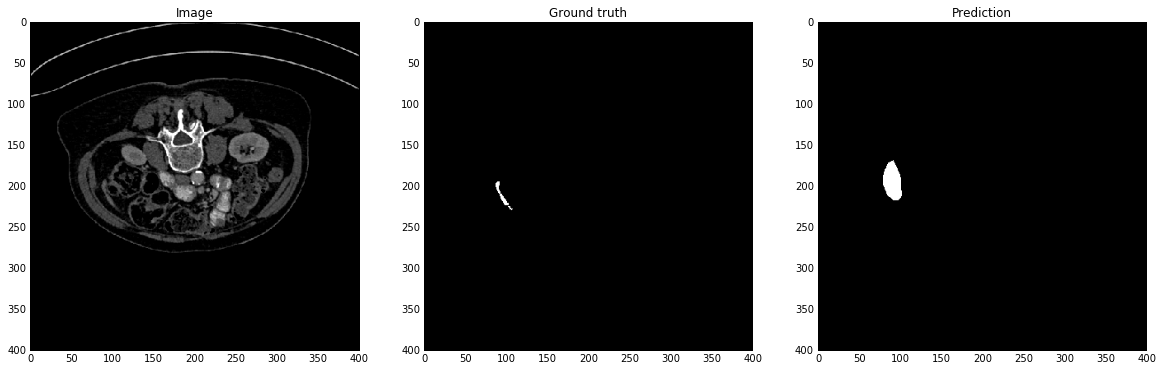

In [5]:
img,seg = read_imgs(dbimg,dbseg,20)
pred = predict(net,img,seg,mean)

Dice: 0.589029040774
Prediction class histogram Label counts:  157595  ,  2405  ,  0
None
Ground truth class histogram Label counts:  158996  ,  1004  ,  0
None


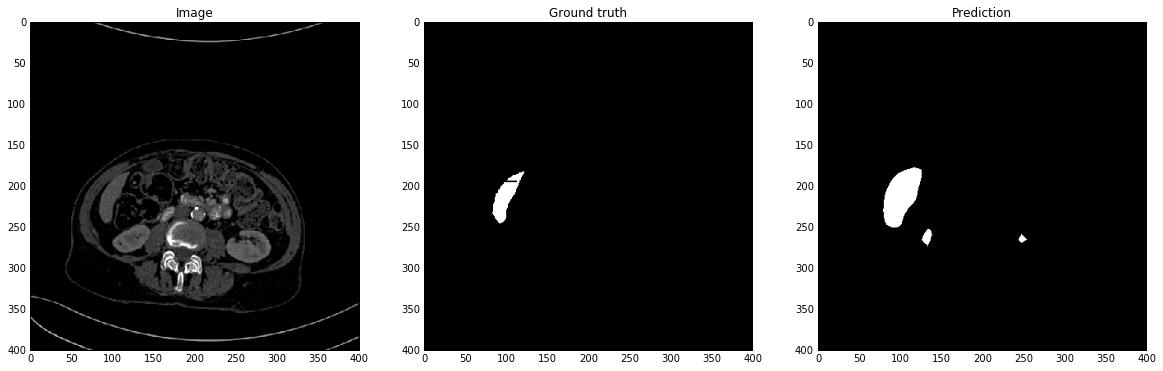

In [6]:
img,seg = read_imgs(dbimg,dbseg,200)
pred = predict(net,img,seg,mean)

Dice: 0.726704545455
Prediction class histogram Label counts:  157759  ,  2241  ,  0
None
Ground truth class histogram Label counts:  158721  ,  1279  ,  0
None


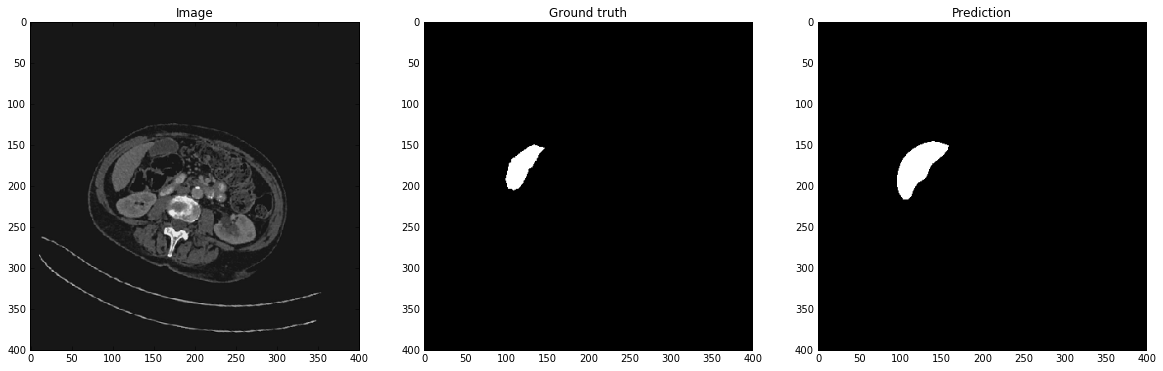

In [7]:
img,seg = read_imgs(dbimg,dbseg,200)
pred = predict(net,img,seg,mean)

Dice: 0.700927441353
Prediction class histogram Label counts:  154062  ,  5938  ,  0
None
Ground truth class histogram Label counts:  156773  ,  3227  ,  0
None


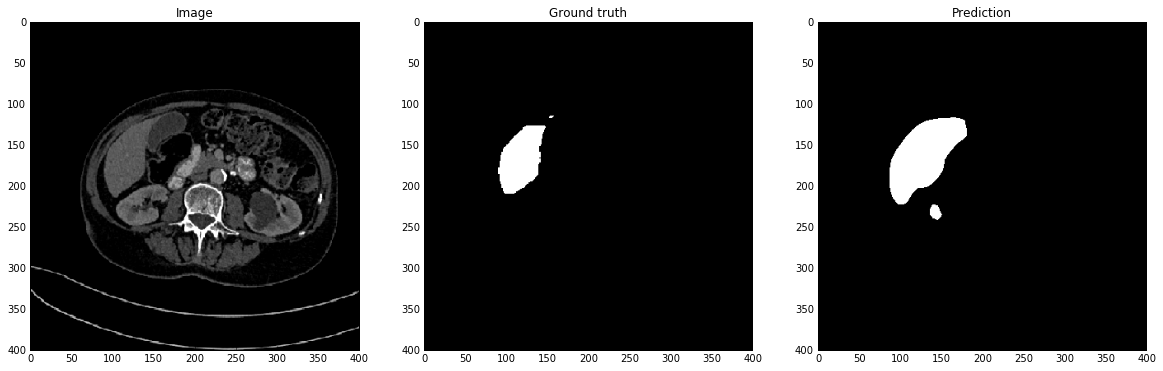

In [8]:
img,seg = read_imgs(dbimg,dbseg,200)
pred = predict(net,img,seg,mean)

Dice: 0.763250109505
Prediction class histogram Label counts:  154737  ,  5263  ,  0
None
Ground truth class histogram Label counts:  156131  ,  3869  ,  0
None


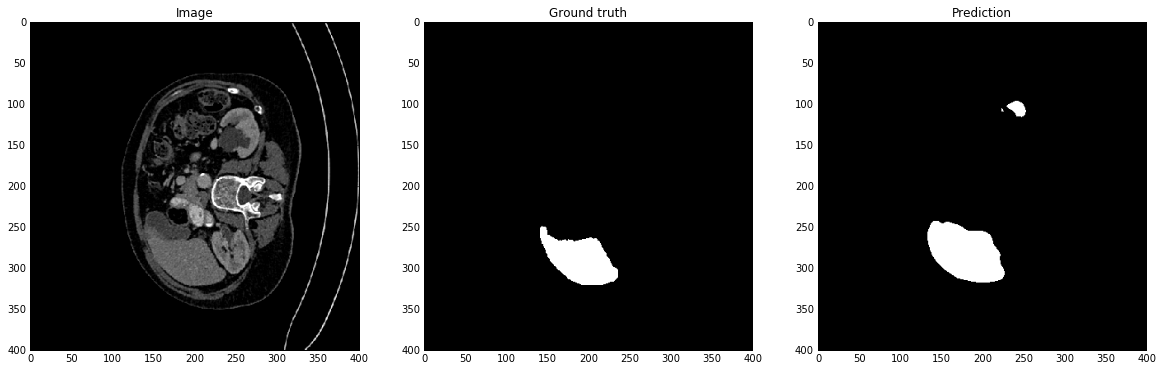

In [9]:
img,seg = read_imgs(dbimg,dbseg,200)
pred = predict(net,img,seg,mean)

Dice: 0.462632059476
Prediction class histogram Label counts:  155440  ,  4560  ,  0
None
Ground truth class histogram Label counts:  149226  ,  10774  ,  0
None


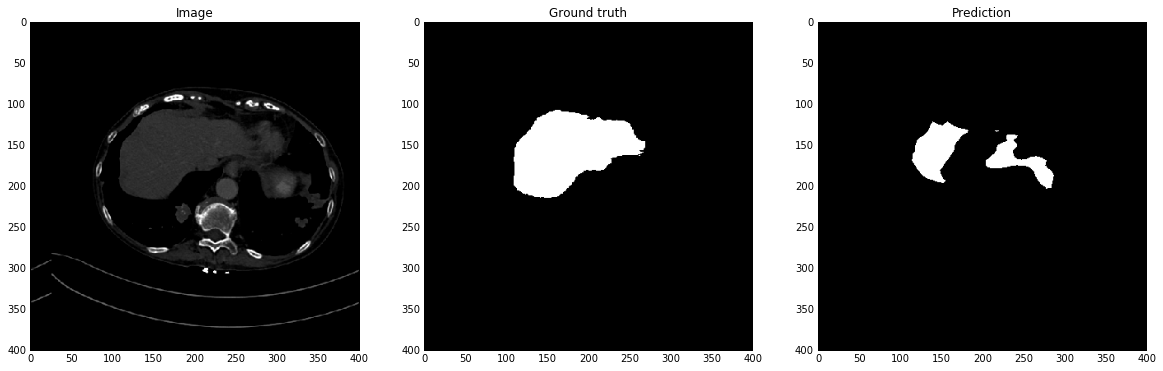

In [10]:
img,seg = read_imgs(dbimg,dbseg,200)
pred = predict(net,img,seg,mean)

Dice: 0.648072910948
Prediction class histogram Label counts:  154239  ,  5761  ,  0
None
Ground truth class histogram Label counts:  156654  ,  3346  ,  0
None


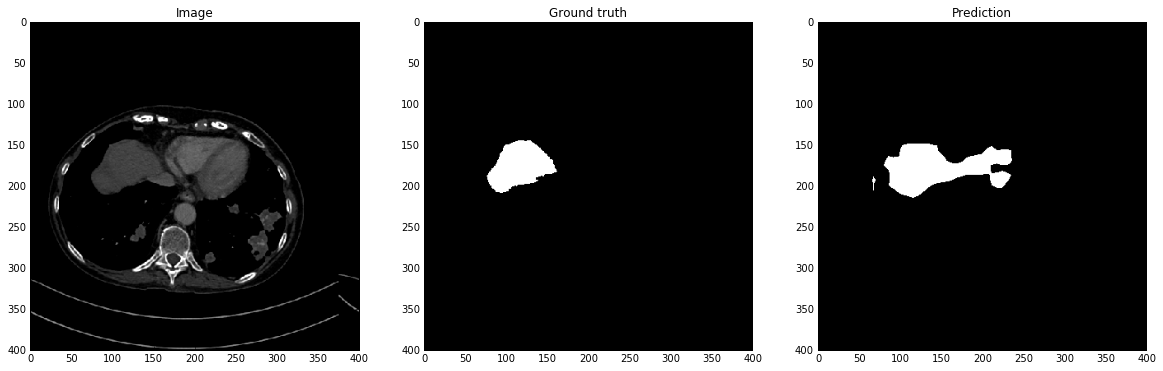

In [11]:
img,seg = read_imgs(dbimg,dbseg,200)
pred = predict(net,img,seg,mean)

Dice: 0.0
Prediction class histogram Label counts:  154625  ,  5375  ,  0
None
Ground truth class histogram Label counts:  159966  ,  34  ,  0
None


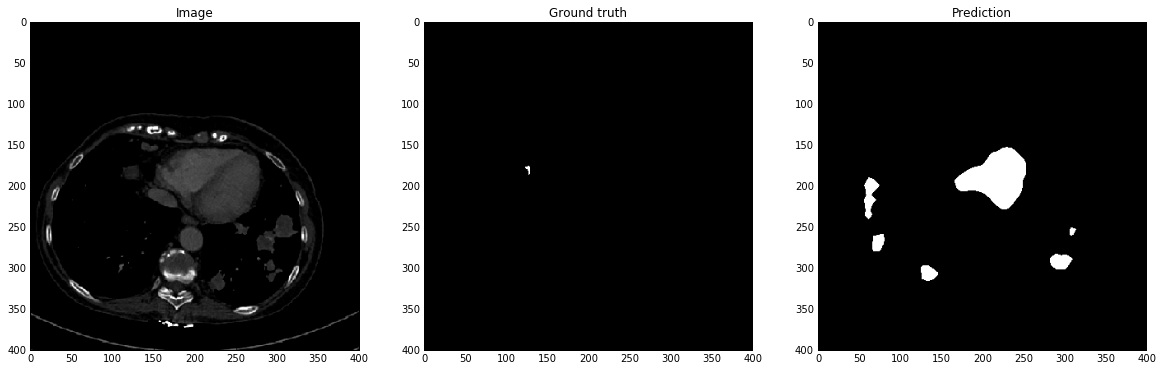

In [12]:
img,seg = read_imgs(dbimg,dbseg,200)
pred = predict(net,img,seg,mean)

Dice: 0.176551278948
Prediction class histogram Label counts:  151346  ,  8654  ,  0
None
Ground truth class histogram Label counts:  156261  ,  3739  ,  0
None


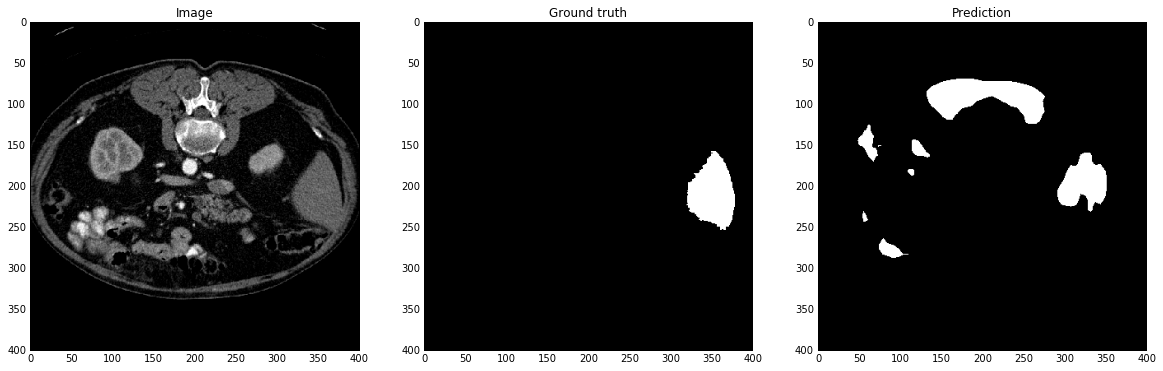

In [13]:
img,seg = read_imgs(dbimg,dbseg,200)
pred = predict(net,img,seg,mean)

Dice: 0.906752411576
Prediction class histogram Label counts:  138827  ,  21173  ,  0
None
Ground truth class histogram Label counts:  139188  ,  20812  ,  0
None


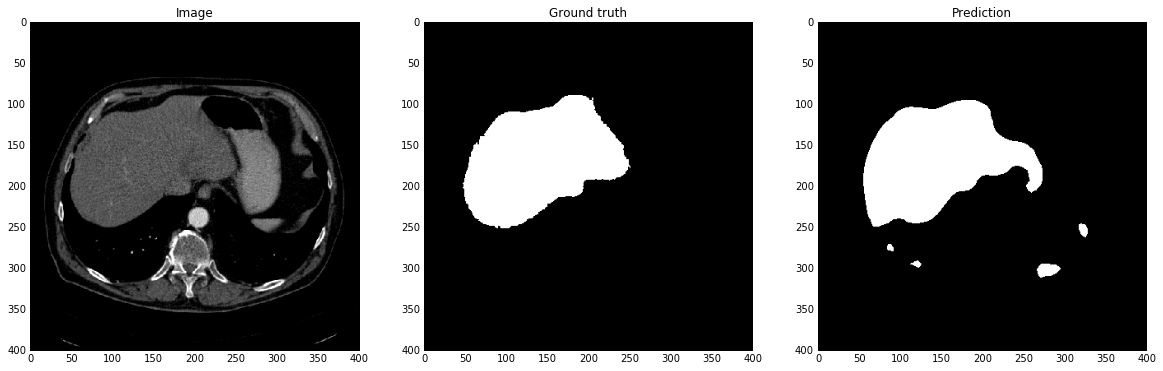

In [14]:
img,seg = read_imgs(dbimg,dbseg,200)
pred = predict(net,img,seg,mean)

Dice: 0.928607390998
Prediction class histogram Label counts:  140671  ,  19329  ,  0
None
Ground truth class histogram Label counts:  139605  ,  20395  ,  0
None


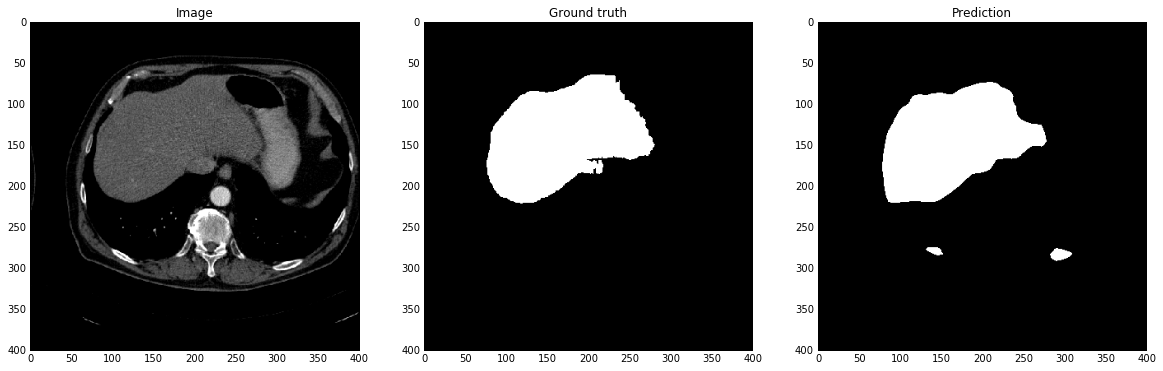

In [15]:
img,seg = read_imgs(dbimg,dbseg,50)
pred = predict(net,img,seg,mean)

Dice: 0.762425975087
Prediction class histogram Label counts:  146200  ,  13800  ,  0
None
Ground truth class histogram Label counts:  149315  ,  10685  ,  0
None


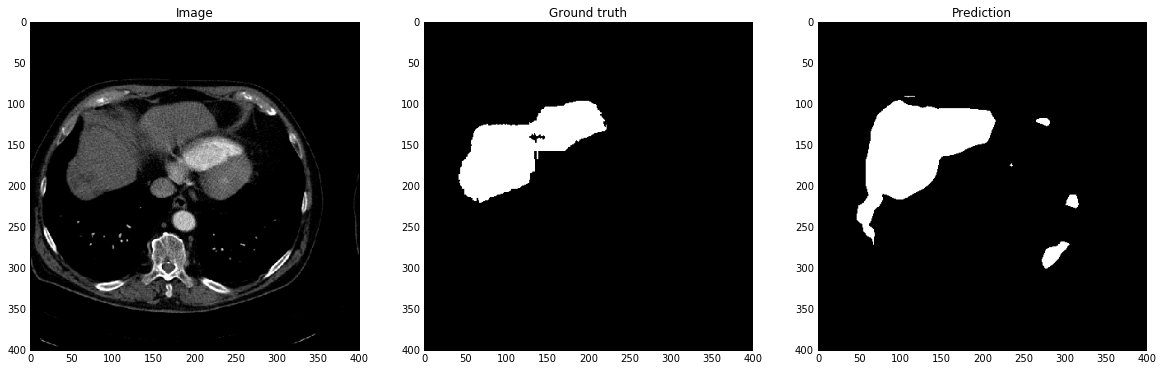

In [16]:
img,seg = read_imgs(dbimg,dbseg,200)
pred = predict(net,img,seg,mean)

Dice: 0.00338082588747
Prediction class histogram Label counts:  155866  ,  4134  ,  0
None
Ground truth class histogram Label counts:  159993  ,  7  ,  0
None


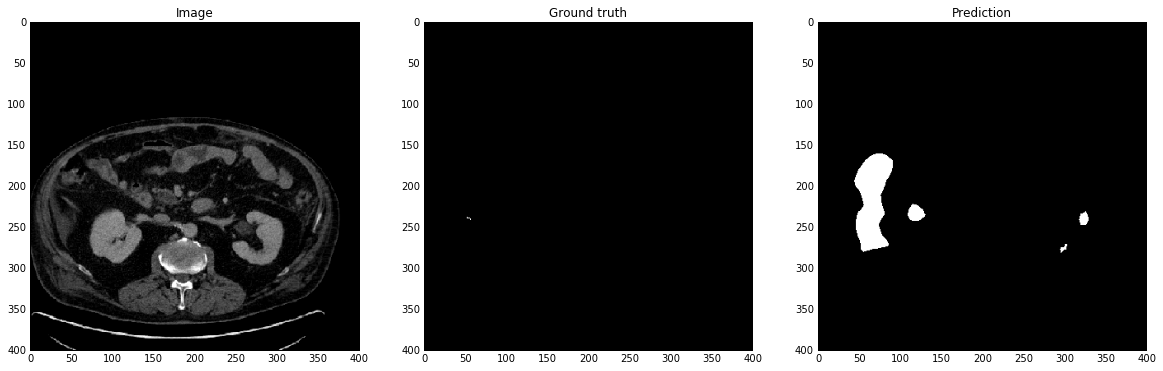

In [17]:
img,seg = read_imgs(dbimg,dbseg,200)
pred = predict(net,img,seg,mean)

Dice: 0.494036409291
Prediction class histogram Label counts:  152864  ,  7136  ,  0
None
Ground truth class histogram Label counts:  157578  ,  2422  ,  0
None


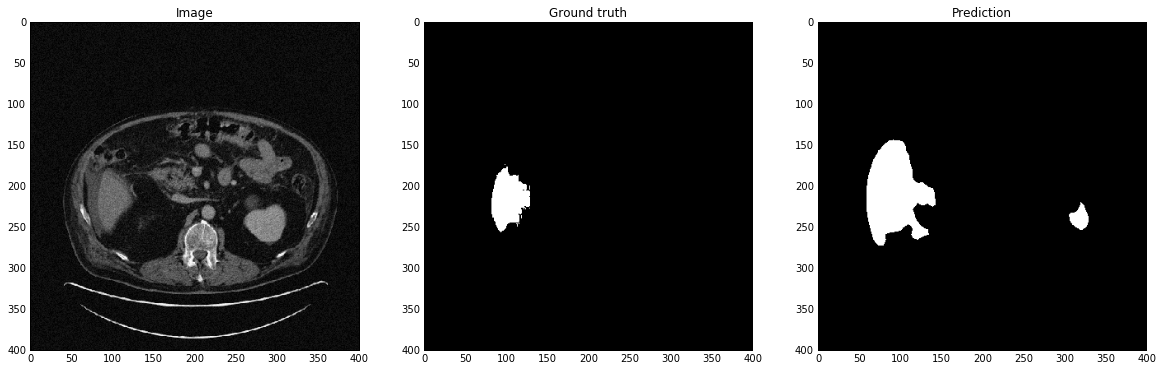

In [18]:
img,seg = read_imgs(dbimg,dbseg,100)
pred = predict(net,img,seg,mean)

Dice: 0.803292317925
Prediction class histogram Label counts:  153629  ,  6371  ,  0
None
Ground truth class histogram Label counts:  154343  ,  5657  ,  0
None


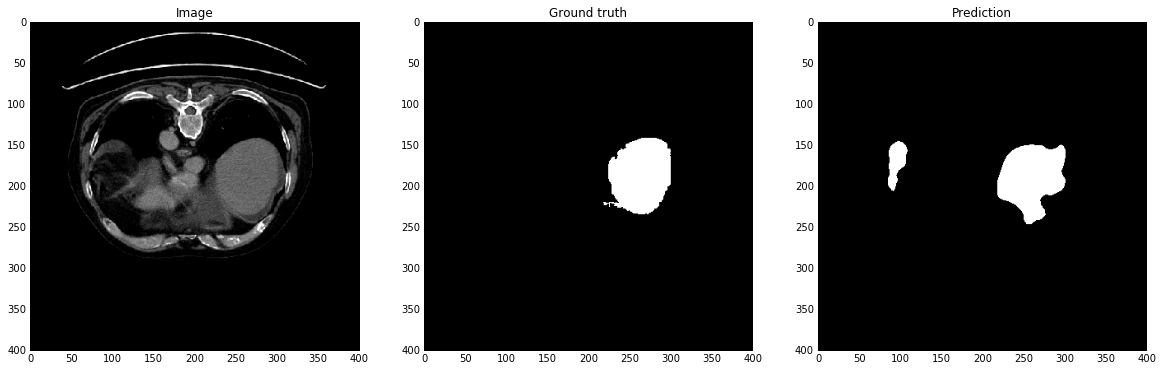

In [19]:
img,seg = read_imgs(dbimg,dbseg,100)
pred = predict(net,img,seg,mean)

In [20]:
print "Average of above dices :",np.mean(dices)

Average of above dices : 0.543024448942
